# Trabalho 4

Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

Importando e ajeitando a tabela das amostras

In [ ]:
df = pd.read_excel("../data/T4_XS.xlsx") #Ler o arquivo excel.
dfMedidas = df.drop(["Amostra"], axis = 1) #Retira a coluna Amostra, criando assim um dataframe com apenas as medidas.
display(dfMedidas) #Exibe o dataframe Medidas.

,Medida_1,Medida_2,Medida_3,Medida_4,Medida_5,Medida_6,Medida_7,Medida_8,Medida_9,Medida_10,Medida_11,Medida_12,Medida_13,Medida_14
0,76.523,78.655,78.143,78.558,79.625,76.916,77.527,80.040,77.712,78.736,75.400,76.241,79.183,74.663
1,74.841,79.495,78.634,77.433,77.663,77.370,78.072,80.079,73.722,74.050,80.456,78.264,80.223,76.219
2,76.388,76.546,77.358,77.715,79.597,76.115,79.731,77.722,77.803,77.760,77.628,79.231,78.122,77.764
3,77.009,77.793,77.869,78.889,79.672,75.304,77.834,77.910,78.204,77.758,78.015,79.692,77.437,78.297
4,77.991,80.150,77.126,78.936,79.914,76.145,78.556,78.685,78.088,75.878,76.066,73.772,77.032,76.712
5,76.286,78.841,78.266,76.217,76.555,81.961,76.208,73.172,77.471,75.567,71.909,78.294,77.379,79.080
6,79.743,74.143,76.488,76.840,78.834,76.438,76.796,77.549,79.015,76.693,78.266,78.321,76.342,81.050
7,79.873,77.409,74.983,76.427,76.084,80.164,78.088,78.243,76.125,74.687,78.515,79.158,83.428,78.367
8,78.006,83.192,74.824,75.999,76.932,75.890,76.591,77.876,78.324,78.228,78.877,80.972,82.005,75.630
9,76.615,74.359,74.985,75.227,78.331,75.991,80.569,78.078,81.304,78.435,79.497,76.359,78.409,74.342


Ajeitando a tabela de parâmetros

In [ ]:
parametros = pd.read_excel("TEP00120 - TABELAS.xlsx", header = None) #Importa o arquivo sem o cabeçalho.
parametros = parametros.drop([0,1], axis = 0) #Retira as duas primeiras linhas da tabela de valores.
parametros.columns = parametros.iloc[0].values #Substitui o cabeçalho da planilha pelos valores da primeira linha.
parametros = parametros.drop([2], axis = 0) #Retira a primeira linha.
parametros.index = range(len(parametros)) #Conserta os índices das linhas da tabela.
display(parametros) #Exibe o dataframe da tabela de valores.

def parametro(p, n): #Definindo uma função para buscar o parâmetro desejado no dataframe parametros.
  p = str(p) #É o parâmetro que desejamos encontrar.
  n = abs(int(n)) #É o tamanho de cada amostra.
  if n > len(parametros): #Suite para obter os valores da tabela.
    return parametros.loc[parametros.loc[len(parametros) - 1, "n"], p]
  elif n >= 2:
    return parametros.loc[n - 2, p]
  else:
    return 0

,n,A,A2,A3,c4,1/c4,B3,B4,B5,B6,d2,1/d2,d3,D1,D2,D3,D4
0,2,2.121,1.88,2.659,0.7979,1.2533,0,3.267,0,2.606,1.128,0.8865,0.853,0,3.686,0,3.267
1,3,1.732,1.023,1.954,0.8862,1.1284,0,2.568,0,2.276,1.693,0.5907,0.888,0,4.358,0,2.574
2,4,1.5,0.729,1.628,0.9213,1.0854,0,2.266,0,2.088,2.059,0.4857,0.88,0,4.698,0,2.282
3,5,1.342,0.577,1.427,0.94,1.0638,0,2.089,0,1.964,2.326,0.4299,0.864,0,4.918,0,2.114
4,6,1.225,0.483,1.287,0.9515,1.051,0.03,1.97,0.029,1.874,2.534,0.3946,0.848,0,5.078,0,2.004
5,7,1.134,0.419,1.182,0.9594,1.0423,0.118,1.882,0.113,1.806,2.704,0.3698,0.833,0.204,5.204,0.076,1.924
6,8,1.061,0.373,1.099,0.965,1.0363,0.185,1.815,0.179,1.751,2.847,0.3512,0.82,0.388,5.306,0.136,1.864
7,9,1,0.337,1.032,0.9693,1.0317,0.239,1.761,0.232,1.707,2.97,0.3367,0.808,0.547,5.393,0.184,1.816
8,10,0.949,0.308,0.975,0.9727,1.0281,0.284,1.716,0.276,1.669,3.078,0.3249,0.797,0.687,5.469,0.223,1.777
9,11,0.905,0.285,0.927,0.9754,1.0252,0.321,1.679,0.313,1.637,3.173,0.3152,0.787,0.811,5.535,0.256,1.744


Calculando os parâmetros para criar o gráfico de $S$

In [ ]:
df["S"] = dfMedidas.std(axis = 1) # Cria a coluna S com os desvios padrões das amostras.
B3 = parametro("B3", len(dfMedidas.columns)) # Obtendo o parâmetro B3.
B4 = parametro("B4", len(dfMedidas.columns)) # Obtendo o parâmetro B4.
LM_S = df["S"].mean() # Calculando a Linha Média de S.
LIC_S = LM_S * B3 # Calculando a Linha Inferior de Controle de S.
LSC_S = LM_S * B4 # Calculando a Linha Superior de Controle de S.

Verifica se o $R$ de cada amostra se encontra dentro dos limites superior e inferior calculados anteriormente. Caso contrário, essa amostra será descartada e os limites e a média para $R$ serão recalculados.

In [ ]:
i = 0
while i < len(df):
  if df.loc[i,"S"] < LIC_S or df.loc[i,"S"] > LSC_S: #Verifica se o S de uma amostra foge dos limites.
    df = df.drop([i], axis=0) #Deleta a linha.
    df.index = range(len(df)) #Atualiza os indices.
    LM_S = df["S"].mean() #Recalculando a Linha Média de S.
    LIC_S = LM_S * B3 #Recalculando a Linha Inferior de Controle de S.
    LSC_S = LM_S * B4 #Recalculando a Linha Superior de Controle de S.
  i = i + 1
display(df) #É possível ver que a amostra 18 foi descartada.

,Amostra,Medida_1,Medida_2,Medida_3,Medida_4,Medida_5,Medida_6,Medida_7,Medida_8,Medida_9,Medida_10,Medida_11,Medida_12,Medida_13,Medida_14,S
0,1,76.523,78.655,78.143,78.558,79.625,76.916,77.527,80.040,77.712,78.736,75.400,76.241,79.183,74.663,1.592514
1,2,74.841,79.495,78.634,77.433,77.663,77.370,78.072,80.079,73.722,74.050,80.456,78.264,80.223,76.219,2.214472
2,3,76.388,76.546,77.358,77.715,79.597,76.115,79.731,77.722,77.803,77.760,77.628,79.231,78.122,77.764,1.100715
3,4,77.009,77.793,77.869,78.889,79.672,75.304,77.834,77.910,78.204,77.758,78.015,79.692,77.437,78.297,1.084625
4,5,77.991,80.150,77.126,78.936,79.914,76.145,78.556,78.685,78.088,75.878,76.066,73.772,77.032,76.712,1.741332
5,6,76.286,78.841,78.266,76.217,76.555,81.961,76.208,73.172,77.471,75.567,71.909,78.294,77.379,79.080,2.488410
6,7,79.743,74.143,76.488,76.840,78.834,76.438,76.796,77.549,79.015,76.693,78.266,78.321,76.342,81.050,1.735418
7,8,79.873,77.409,74.983,76.427,76.084,80.164,78.088,78.243,76.125,74.687,78.515,79.158,83.428,78.367,2.312774
8,9,78.006,83.192,74.824,75.999,76.932,75.890,76.591,77.876,78.324,78.228,78.877,80.972,82.005,75.630,2.479573
9,10,76.615,74.359,74.985,75.227,78.331,75.991,80.569,78.078,81.304,78.435,79.497,76.359,78.409,74.342,2.250625


Construindo o gráfico de $S$

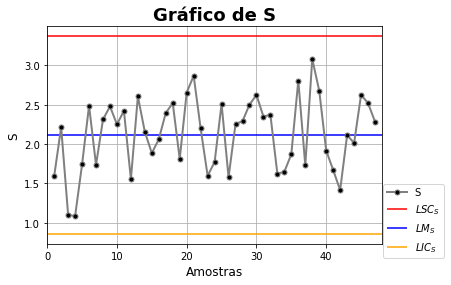

In [ ]:
plt.plot(range(1, len(df) + 1),  df["S"], color = 'gray', linewidth = 2, marker = 'o', markerfacecolor = 'black' , markersize = 5) 
plt.hlines(LSC_S, xmin = 0, xmax = len(df) + 1, colors = "red") #Adiciona a Linha Superior de Controle de R.
plt.hlines(LM_S, xmin = 0, xmax = len(df) + 1, colors = "blue") #Adiciona a linha Linha Média de R.
plt.hlines(LIC_S, xmin = 0, xmax = len(df) + 1, colors = "orange") #Adiciona a Linha Inferior de Controle de R.
plt.legend(['S', '$LSC_S$', '$LM_S$', '$LIC_S$'], loc = 'best', bbox_to_anchor=(1.2, 0.3)) #Adiciona a legenda.
plt.grid(True)
plt.title(
    "Gráfico de S",
    fontdict = {
        'family':'roboto',
        'color':'black',
        'weight':'bold',
        'size': 18
    }
)
plt.xlabel(
    "Amostras",
    fontdict = {
        'family':'raleway', 
        'color':'black',
        'weight': 12,
        'size': 12
    }
)
plt.xlim(left = 0, right = len(df) + 1) # Define o intervalo de exibição do eixo horizontal.
plt.ylabel( # Adiciona o título para o eixo vertical.
    "S",
    fontdict = {
        'family':'raleway',
        'color':'black',
        'weight': 12,
        'size': 12
    }
)
plt.show #Exibe o gráfico.
plt.savefig('Gráfico_S.png', format = 'png', dpi = 300, bbox_inches = 'tight') #Salva o gráfico em formato png.

Calculando os parâmetros necessários para criar o gráfico de $\overline{X}$

In [ ]:
df["Xbarra"] = dfMedidas.mean(axis = 1) #Cria a coluna Xbarra com as médias de cada amostra.
A3 = parametro("A3", len(dfMedidas.columns)) #Obtendo o parâmetro A3.
LM_Xbarra = df["Xbarra"].mean() #Calculando a Linha Média de Xbarra.
LIC_Xbarra = LM_Xbarra - LM_S * A3 #Calculando a Linha Inferior de Controle de Xbarra.
LSC_Xbarra = LM_Xbarra + LM_S * A3 #Calculando a Linha Superior de Controle de Xbarra.

Verifica se o $\overline{X}$ de cada amostra se encontra dentro dos limites superior e inferior calculados anteriormente. Caso contrário, essa amostra será descartada e os limites e a média para $\overline{X}$ serão recalculados.

In [ ]:
i = 0
while i < len(df):
  if df.loc[i,"Xbarra"] < LIC_Xbarra or df.loc[i,"Xbarra"] > LSC_Xbarra: #Verifica se Xbarra de uma amostra foge dos limites.
    df = df.drop([i], axis = 0) #Deleta a linha.
    df.index = range(len(df)) #Atualiza os indices.
    LM_Xbarra = df["Xbarra"].mean() #Recalculando a Linha Média de Xbarra.
    LIC_Xbarra = LM_Xbarra - LM_S * A3 #Recalculando a Linha Inferior de Controle de Xbarra.
    LSC_Xbarra = LM_Xbarra + LM_S * A3 #Recalculando a Linha Superior de Controle de Xbarra.
  i = i + 1
display(df) #É possível ver que a amostra 34 foi descartada.

,Amostra,Medida_1,Medida_2,Medida_3,Medida_4,Medida_5,Medida_6,Medida_7,Medida_8,Medida_9,Medida_10,Medida_11,Medida_12,Medida_13,Medida_14,S,Xbarra
0,1,76.523,78.655,78.143,78.558,79.625,76.916,77.527,80.040,77.712,78.736,75.400,76.241,79.183,74.663,1.592514,77.708714
1,2,74.841,79.495,78.634,77.433,77.663,77.370,78.072,80.079,73.722,74.050,80.456,78.264,80.223,76.219,2.214472,77.608643
2,3,76.388,76.546,77.358,77.715,79.597,76.115,79.731,77.722,77.803,77.760,77.628,79.231,78.122,77.764,1.100715,77.820000
3,4,77.009,77.793,77.869,78.889,79.672,75.304,77.834,77.910,78.204,77.758,78.015,79.692,77.437,78.297,1.084625,77.977357
4,5,77.991,80.150,77.126,78.936,79.914,76.145,78.556,78.685,78.088,75.878,76.066,73.772,77.032,76.712,1.741332,77.503643
5,6,76.286,78.841,78.266,76.217,76.555,81.961,76.208,73.172,77.471,75.567,71.909,78.294,77.379,79.080,2.488410,76.943286
6,7,79.743,74.143,76.488,76.840,78.834,76.438,76.796,77.549,79.015,76.693,78.266,78.321,76.342,81.050,1.735418,77.608429
7,8,79.873,77.409,74.983,76.427,76.084,80.164,78.088,78.243,76.125,74.687,78.515,79.158,83.428,78.367,2.312774,77.967929
8,9,78.006,83.192,74.824,75.999,76.932,75.890,76.591,77.876,78.324,78.228,78.877,80.972,82.005,75.630,2.479573,78.096143
9,10,76.615,74.359,74.985,75.227,78.331,75.991,80.569,78.078,81.304,78.435,79.497,76.359,78.409,74.342,2.250625,77.321500


Construindo o gráfico de $\overline{X}$

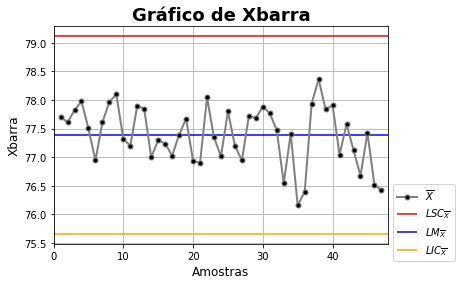

In [ ]:
plt.plot(range(1, len(df) + 1),  df["Xbarra"], color = 'gray', linewidth = 2, marker = 'o', markerfacecolor = 'black', markersize = 5)
plt.hlines(LSC_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "red") #Adiciona a Linha Superior de Controle de Xbarra.
plt.hlines(LM_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "blue") #Adiciona a linha Linha Média de Xbarra.
plt.hlines(LIC_Xbarra, xmin = 0, xmax = len(df) + 1, colors = "orange") #Adiciona a Linha Inferior de Controle de Xbarra.
plt.legend(['$\overline{X}$', '$LSC_{\overline{X}}$', '$LM_{\overline{X}}$', '$LIC_{\overline{X}}$'], loc = 'best', bbox_to_anchor=(1.0, 0.3))
plt.grid(True)
plt.title(
    "Gráfico de Xbarra",
    fontdict = {
        'family':'roboto',
        'color':'black',
        'weight':'bold',
        'size': 18
    }
)
plt.xlabel(
    "Amostras",
    fontdict = {
        'family':'raleway', 
        'color':'black',
        'weight': 12,
        'size': 12
    }
)
plt.xlim(left = 0, right = len(df) + 1) #Define o intervalo de exibição do eixo horizontal.
plt.ylabel(
    "Xbarra",
    fontdict = {
        'family':'raleway', 
        'color':'black',
        'weight': 12,
        'size': 12
    }
)
plt.show #Exibe o gráfico.
plt.savefig('Gráfico_Xbarra.png', format = 'png', dpi = 300, bbox_inches = 'tight')

Definindo algumas funções úteis

In [ ]:
def desempenhoXbarra(n, H0, Erro, delt = 0, k = 3): #Definindo uma função para calcular o desempenho do gráfico de Xbarra.
  
  n = abs(int(n)) #Tamanho de cada amostra.
  k = abs(float(k)) #Quantidade de desvios padrões considerados para distanciar LSC_X e LIC_X da média LM_X.
                    #O valor de k geralmente adotado é de 3 desvios padrões.
  delt = abs(float(delt)) #Parâmetro delta.
  H0 = bool(H0) #Armazena o valor lógico da hipótese H0: mu = mu0
  Erro = bool(Erro) #Armazena o valor lógico da ocorrência de erro ou não.
  if H0 == True: #Caso a hipótese nula seja verdadeira, então...
    alpha = 1 - norm.cdf(k) + norm.cdf(-k)
    if Erro == True: #Ou seja, se o erro do tipo I for verdadeiro.
      return alpha
    else:
      return 1 - alpha
  else: #Caso a hipótese nula seja falsa, ou seja, H1: mu <> mu0 é verdadeira, então...
    beta = norm.cdf(k - delt*(n**0.5)) - norm.cdf(-k - delt*(n**0.5))
    if Erro == True: #Ou seja, se o erro do tipo II for verdadeiro.
      return beta
    else:
      return 1 - beta #Que corresponde ao poder de detecção do gráfico de Xbarra.

def PdXbarra(n, delt, k = 3):
  n = abs(int(n)) #Tamanho de cada amostra.
  k = abs(float(k)) #Quantidade de desvios padrões.
  delt = abs(float(delt)) #Parâmetro delta.
  return desempenhoXbarra(n = n, H0 = False, Erro = False, delt = delt, k = k)

def listDelta(deltaMax, passo = 0.1): #Função que retorna uma lista de valores para delta.
  valoresDelta = list()
  deltaMax = abs(float(deltaMax))
  passo = abs(float(passo))
  delt = 0
  while delt <= deltaMax:
    valoresDelta.append(delt)
    delt = delt + passo
  return valoresDelta

def listPdXbarra(n, deltaMax, passo = 0.1): #Função que retorna uma lista de valores para PdXbarra.
  n = abs(int(n)) #Tamanho de cada amostra.
  deltMax = abs(float(deltaMax)) #Tamanho máximo do valor de delta.
  passo = abs(float(passo)) #De quanto em quanto o valor de delta vai ser incrementado.
  ValoresPdXbarra = list()
  delt = 0
  while delt <= deltaMax:
    ValoresPdXbarra.append(PdXbarra(n = n, delt = delt))
    delt = delt + passo
  return ValoresPdXbarra

Construindo o gráfico do poder de detecção de $\overline{X}$

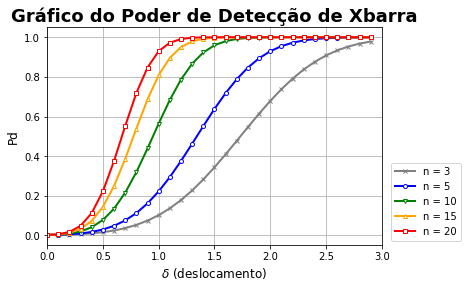

In [ ]:
deltaMax = 3 #Definindo o valor máximo de delta.
passo = 0.1 #Definindo o incremento para os valores de delta.

# Vamos plotar algumas linhas para diferentes valores de tamanho amostral n.

plt.plot(listDelta(deltaMax, passo), listPdXbarra(3, deltaMax, passo), color = 'gray', linewidth = 2, marker = 'x', markerfacecolor = 'white', markersize = 4)
plt.plot(listDelta(deltaMax, passo), listPdXbarra(5, deltaMax, passo), color = 'blue', linewidth = 2, marker = 'o', markerfacecolor = 'white', markersize = 4)
plt.plot(listDelta(deltaMax, passo), listPdXbarra(10, deltaMax, passo), color = 'green', linewidth = 2, marker = 'v', markerfacecolor = 'white', markersize = 4)
plt.plot(listDelta(deltaMax, passo), listPdXbarra(15, deltaMax, passo), color = 'orange', linewidth = 2, marker = '^', markerfacecolor = 'white', markersize = 4)
plt.plot(listDelta(deltaMax, passo), listPdXbarra(20, deltaMax, passo), color = 'red', linewidth = 2, marker = 's', markerfacecolor = 'white', markersize = 4)
plt.legend(['n = 3','n = 5', 'n = 10', 'n = 15', 'n = 20'], loc = 'best', bbox_to_anchor=(1.25, 0.4)) #Adiciona a legenda.
plt.grid(True)
plt.title(
    "Gráfico do Poder de Detecção de Xbarra",
    fontdict = {
        'family':'roboto',
        'color':'black',
        'weight':'bold',
        'size': 18
    }
)
plt.xlabel(
    "$\delta$ (deslocamento)",
    fontdict = {
        'family':'raleway',
        'color':'black',
        'weight': 12,
        'size': 12
    }
)
plt.xlim(left = 0, right = deltaMax) #Define o intervalo de exibição do eixo horizontal.
plt.ylabel(
    "Pd",
    fontdict = {
        'family':'raleway', 
        'color':'black',
        'weight': 12,
        'size': 12
    }
)
plt.show()
plt.savefig('Gráfico_PdXbarra.png', format = 'png', dpi = 300, bbox_inches = 'tight')